# House price prediction Chennai

# Name: Sajin Raj Amatya 

# Importing necessary libraries and module 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor

# 1) Data Loading 



In [7]:
#loading the csv file using pandas read_csv() method
house_price_df = pd.read_csv("Chennai houseing sale.csv")

# 2) Data Understanding 

## 2.1) Inspection of 5 last row of the dataframe 

In [10]:
# print out the last 5 rows of the dataframe
house_price_df.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,...,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


## 2.2 Inspection of first five row of the dataframe 

In [12]:
# print out the top 5 rows of the dataframe 
house_price_df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


## 2.3) Dimension of the dataframe 

In [14]:
#Display the dimension of the dataframe .i.e number of rows and columns 
house_price_df.shape

(7109, 22)

## 2.4) Columns of dataframe

In [16]:
# Display the columns of dataframe using .columns attribute 
house_price_df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

## 2.5) Datatype of each columns in dataframe

In [18]:
# Display the data type of each columns using .dtypes attributes
house_price_df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

## 2.6) Information about each columns in dataframe

In [20]:
# Display the information about each columns like datatypes, rowcount, null value, no.of columns and rows. using info() method  
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

## 2.7) Statistic Description of the numerical columns 

In [22]:
# Statistical descrption of numerical columns including mean,standard deviation, quartile range, 
# maximum and minimum values using  describe() method 
house_price_df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


 ## 2.8) inspection of Null values

In [24]:
#.isna() method display the bool value for missing values and .sum() method is used to count the no. of missing values
house_price_df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

## 2.9) Frequency count  of  each categorical columns values

In [26]:

category_columns = house_price_df.select_dtypes(include=['object']).columns

# Loop to print value counts for each categorical column
for columns in category_columns:
    if not columns in  ['PRT_ID','DATE_SALE','DATE_BUILD'] :
        print(f"Frequency count of unique value  for '{columns}' columns:")
        print(house_price_df[columns].value_counts())
        print("\n")

Frequency count of unique value  for 'AREA' columns:
AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64


Frequency count of unique value  for 'SALE_COND' columns:
SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: count, dtype: int64


Frequency count of unique value  for 'PARK_FACIL' columns:
PARK_FACIL
Yes    3587
No     3520
Noo       2
Name: count, dtype: int64


Frequency count of unique value  for 'BUILDTYPE' columns:
BUILDTYPE
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: count, dtype

## 2.10) Inspection of duplicated values

In [28]:

house_price_df.duplicated().sum()

np.int64(0)

# 3) Data Cleaning 

## 3.1) Imputation the missing values with median value 

In [31]:
# imputation the rows with the missing values 
house_price_df['QS_OVERALL']= house_price_df['QS_OVERALL'].fillna(house_price_df['QS_OVERALL'].median())
house_price_df['N_BATHROOM']= house_price_df['N_BATHROOM'].fillna(house_price_df['N_BATHROOM'].median())
house_price_df['N_BEDROOM']= house_price_df['N_BEDROOM'].fillna(house_price_df['N_BEDROOM'].median())

### Inspection after imputation null values 

In [33]:
house_price_df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

## 3.2 ) Street column cleaning


In [35]:
house_price_df['STREET'] = house_price_df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access' })
house_price_df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

## 3.3) UTILITY_AVAIL column cleaning

In [37]:
house_price_df['UTILITY_AVAIL'] = house_price_df['UTILITY_AVAIL'].replace({'NoSewr ':'NoSewer','All Pub':'AllPub','NoSeWa':'NoSewer'})
house_price_df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewer'], dtype=object)

## 3.4) BUILDTYPE column cleaning 

In [39]:
house_price_df['BUILDTYPE'] = house_price_df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})
house_price_df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

## 3.5) PARK_FACIL column cleaning

In [41]:
house_price_df['PARK_FACIL'] = house_price_df['PARK_FACIL'].replace({'Noo':'No'})
house_price_df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

## 3.6) SALE_COND column cleaning 

In [43]:

house_price_df['SALE_COND'] = house_price_df['SALE_COND'].str.strip().str.replace(' ', '')
house_price_df['SALE_COND'] = house_price_df['SALE_COND'].replace({'Partiall':'Partial','PartiaLl':'Partial'})
house_price_df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'NormalSale'],
      dtype=object)

## 3.7) AREA column cleaning

In [45]:
AREA_correct_mapping = {
    'Chrompt': 'Chromepet',
    'Chrmpet': 'Chromepet',
    'Chormpet': 'Chromepet',
    'Chrompet' : 'Chromepet',
    'Karapakam': 'Karapakkam',
    'KKNagar': 'KK Nagar',
    'Velchery': 'Velachery',
    'Ann Nagar': 'Anna Nagar',
    'Ana Nagar': 'Anna Nagar',
    'Adyr': 'Adyar',
    'TNagar': 'T Nagar'
}
house_price_df['AREA'] = house_price_df['AREA'].replace(AREA_correct_mapping)
house_price_df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'KK Nagar', 'T Nagar'], dtype=object)

## 3.8 Data Type conversion 

In [47]:
house_price_df['DATE_SALE'] = pd.to_datetime(house_price_df['DATE_SALE'],dayfirst=True)
house_price_df['DATE_BUILD'] = pd.to_datetime(house_price_df['DATE_BUILD'],dayfirst=True)
house_price_df['N_BEDROOM'] = house_price_df['N_BEDROOM'].astype(int)
house_price_df['N_BATHROOM'] = house_price_df['N_BATHROOM'].astype(int)

## 3.9) Rounding up the decimal values to 2  for Numerical datatype

In [49]:
numerical_columns = house_price_df.select_dtypes(include=['float64','int64']).columns

house_price_df[numerical_columns]  = house_price_df[numerical_columns].round(2)
house_price_df[numerical_columns]

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1,1,3,4.0,3.9,4.9,4.33,380000,144400,7600000
1,1986,26,2,1,5,4.9,4.2,2.5,3.76,760122,304049,21717770
2,909,70,1,1,3,4.1,3.8,2.2,3.09,421094,92114,13159200
3,1855,14,3,2,5,4.7,3.9,3.6,4.01,356321,77042,9630290
4,1226,84,1,1,3,3.0,2.5,4.1,3.29,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1,1,2,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,1897,52,3,2,5,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,1614,152,2,1,4,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,787,40,1,1,2,4.6,3.8,4.1,4.16,425350,119098,8507000


# 4) Exploratory data analysis

## 4.1) Univariate Analysis 

### 4.1.1) Distribution of Sale Conditions

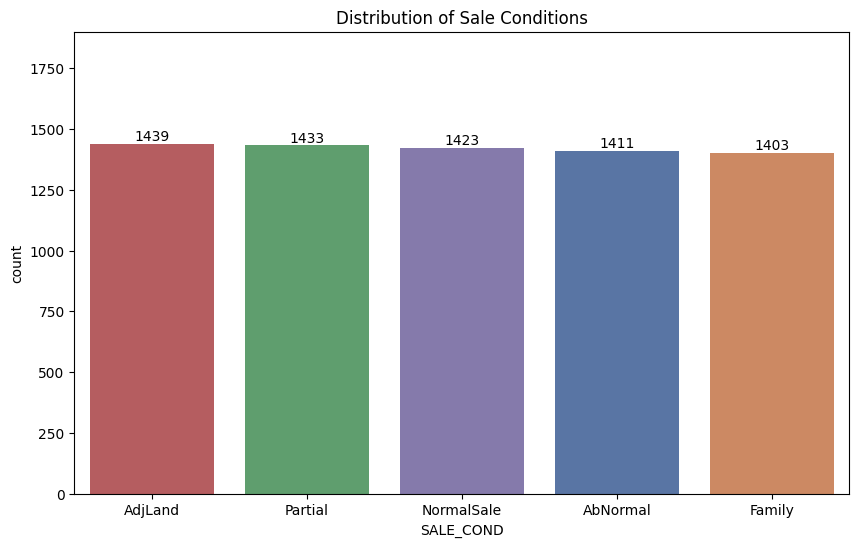

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SALE_COND', data=house_price_df, order=house_price_df['SALE_COND'].value_counts().index,palette = 'deep',hue ="SALE_COND")
plt.title('Distribution of Sale Conditions')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylim(0, 1900)
plt.show()

### 4.1.2) Distribution of utitity avaiablity

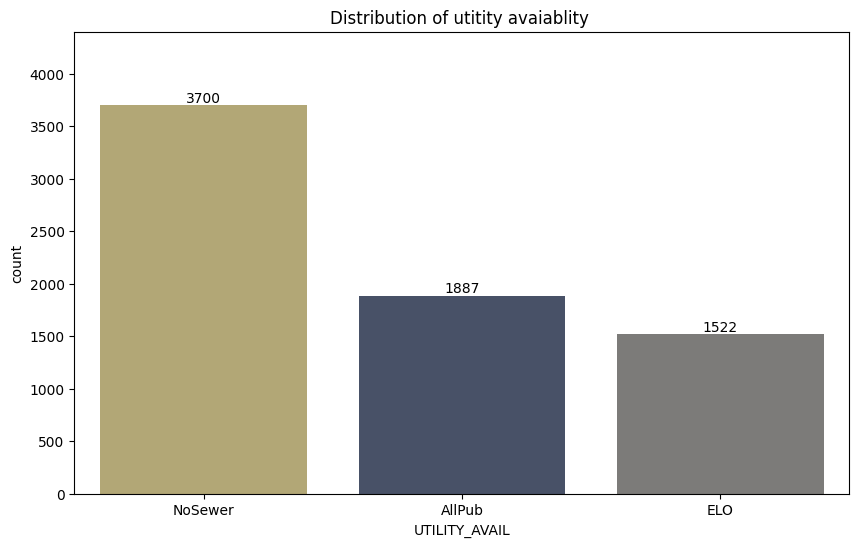

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='UTILITY_AVAIL', data=house_price_df, order=house_price_df['UTILITY_AVAIL'].value_counts().index,palette='cividis', hue = "UTILITY_AVAIL")
plt.title('Distribution of utitity avaiablity ')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylim(0, 4400)
plt.show()

### 4.1.3) Distribution of parking facilities

Text(0.5, 1.0, 'Parking facilities')

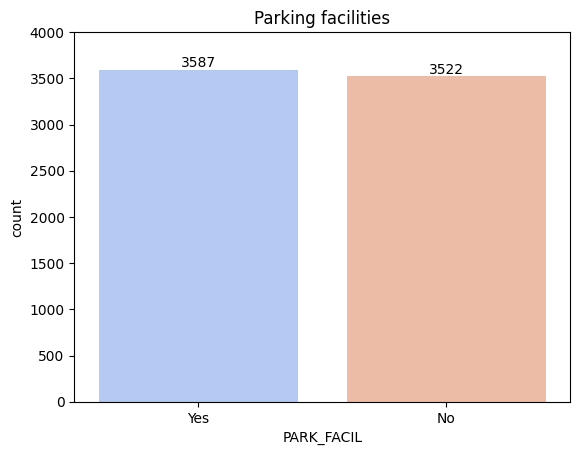

In [57]:

ax = sns.countplot(x='PARK_FACIL', data=house_price_df,palette='coolwarm',hue="PARK_FACIL")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylim(0,4000)
plt.title('Parking facilities')

### 4.1.4 Historgram of SALE_PRICE

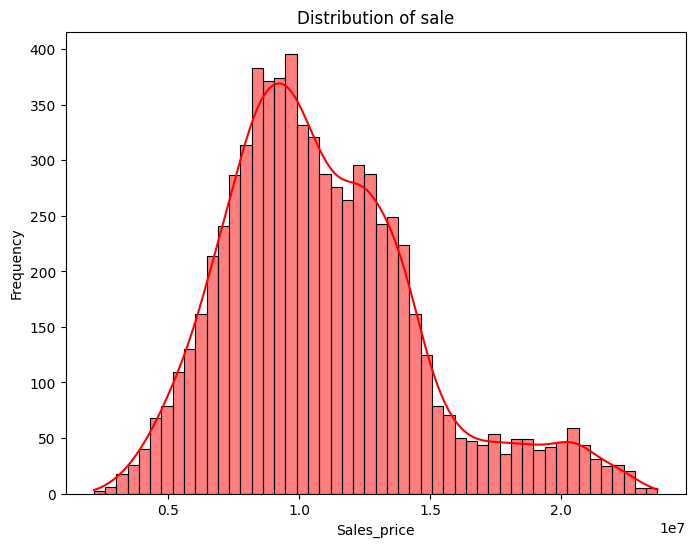

In [59]:
plt.figure(figsize=(8,6))
sns.histplot(house_price_df['SALES_PRICE'], bins=50, kde=True,color='red')
plt.xlabel('Sales_price')
plt.ylabel('Frequency')
plt.title('Distribution of sale');
plt.show()

### 4.1.5) Barplot of N_BATHROOM Column

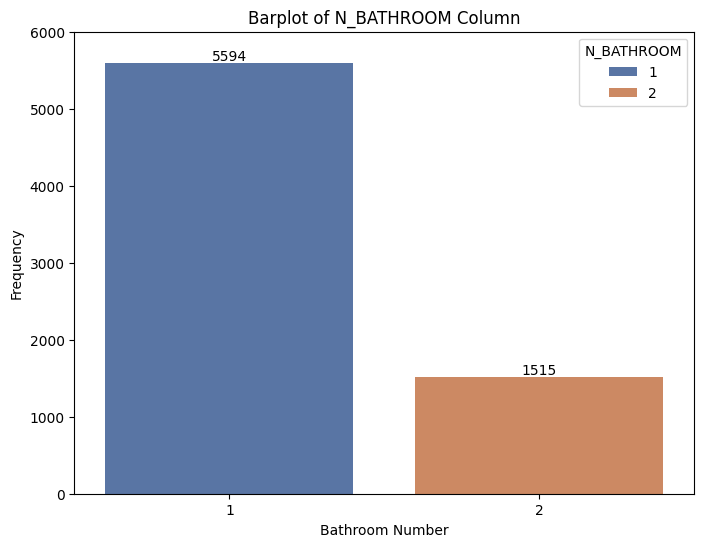

In [61]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=house_price_df, x='N_BATHROOM', palette = 'deep',hue="N_BATHROOM")  # Directly use the column from the DataFrame
plt.xlabel('Bathroom Number')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylabel('Frequency')
plt.title('Barplot of N_BATHROOM Column')
plt.ylim(0,6000)
plt.show()


#### 4.1.6) Barplot of N_BEDROON Column 

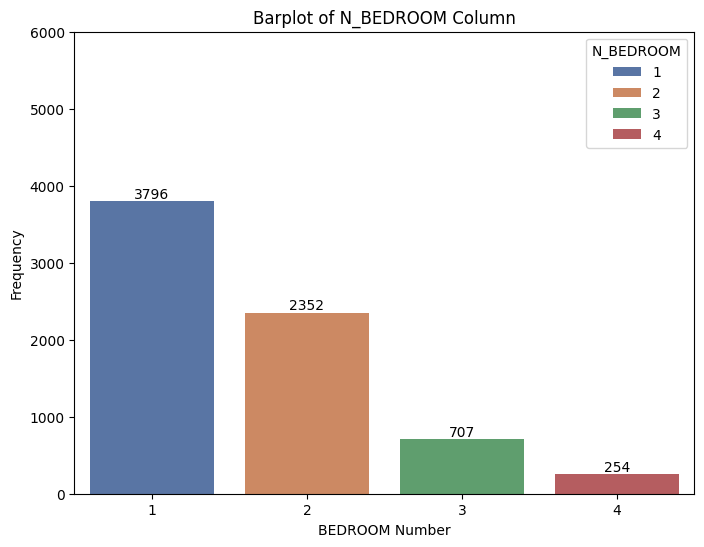

In [63]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=house_price_df, x='N_BEDROOM', palette = 'deep',hue="N_BEDROOM")  # Directly use the column from the DataFrame
plt.xlabel('BEDROOM Number')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylabel('Frequency')
plt.title('Barplot of N_BEDROOM Column')
plt.ylim(0,6000)
plt.show()

### 4.1.7 Boxplot of all numerical columns 

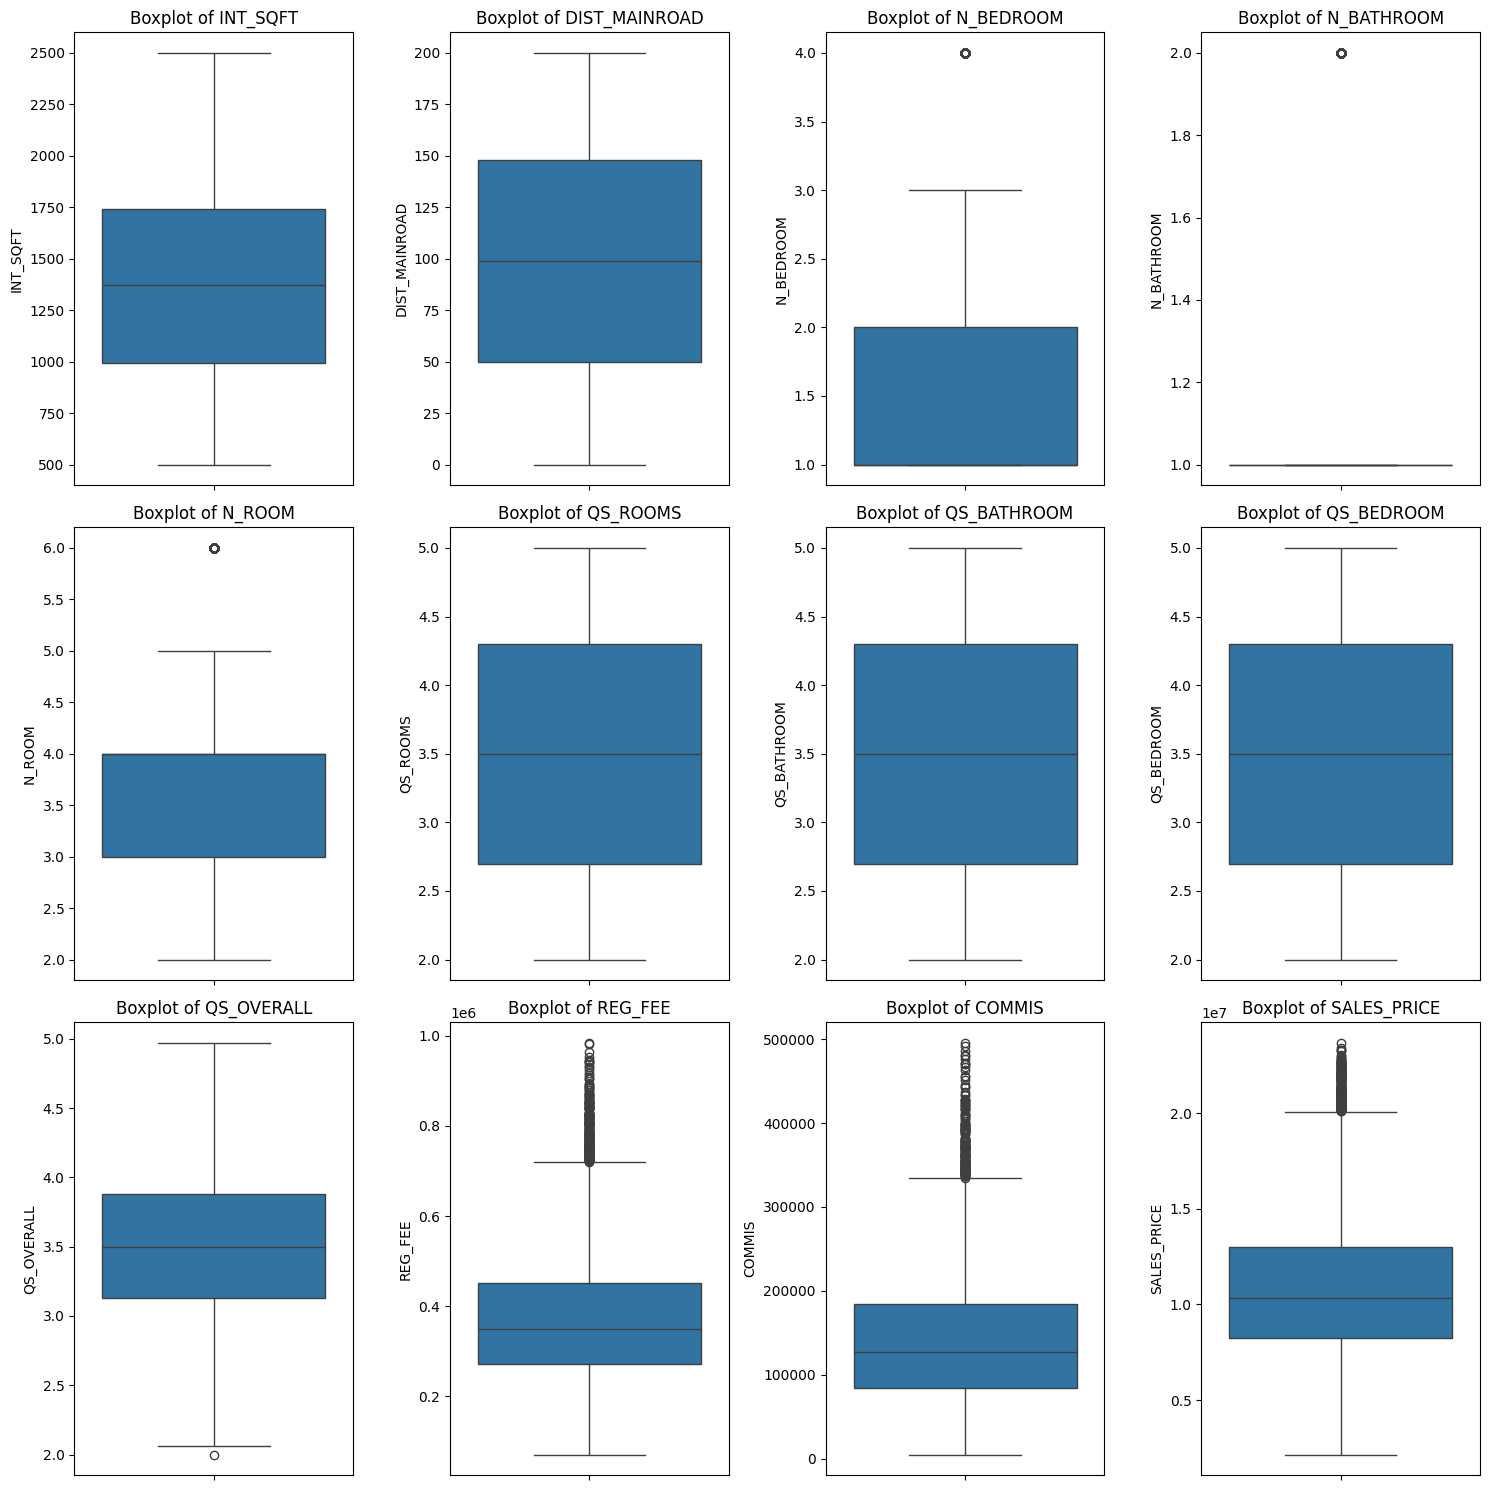

In [65]:
numerical_cols = house_price_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for the grid based on the number of columns
n_cols = 4  # Set number of columns for the grid
n_rows = int(np.ceil(len(numerical_cols) / n_cols))  # Calculate number of rows needed

# Set up the figure for the box plots
plt.figure(figsize=(15, 5 * n_rows))


for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  
    sns.boxplot(y=house_price_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout() 
plt.show()

### 4.1.8 Barplot of STREET condition

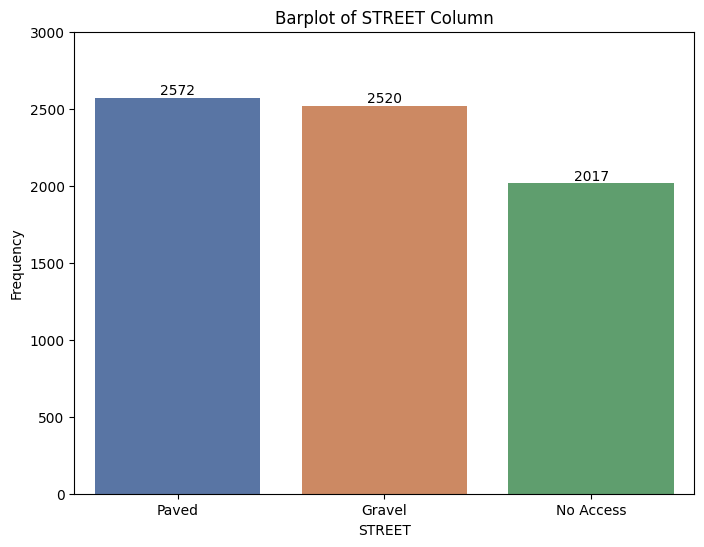

In [67]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=house_price_df, x='STREET', palette='deep',hue  ="STREET" )  # Directly use the column from the DataFrame
plt.xlabel('STREET')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylabel('Frequency')
plt.title('Barplot of STREET Column')
plt.ylim(0,3000)
plt.show()

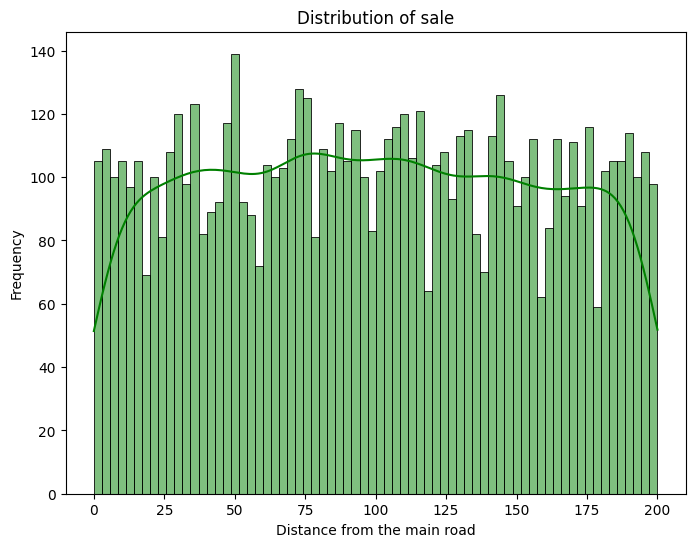

In [68]:
plt.figure(figsize=(8,6))
sns.histplot(house_price_df['DIST_MAINROAD'], bins=70, kde=True,color='green')
plt.xlabel('Distance from the main road')
plt.ylabel('Frequency')
plt.title('Distribution of sale');
plt.show()

## 3.2) Bivarate analysis"

### Average price of the house on basis of AREA 

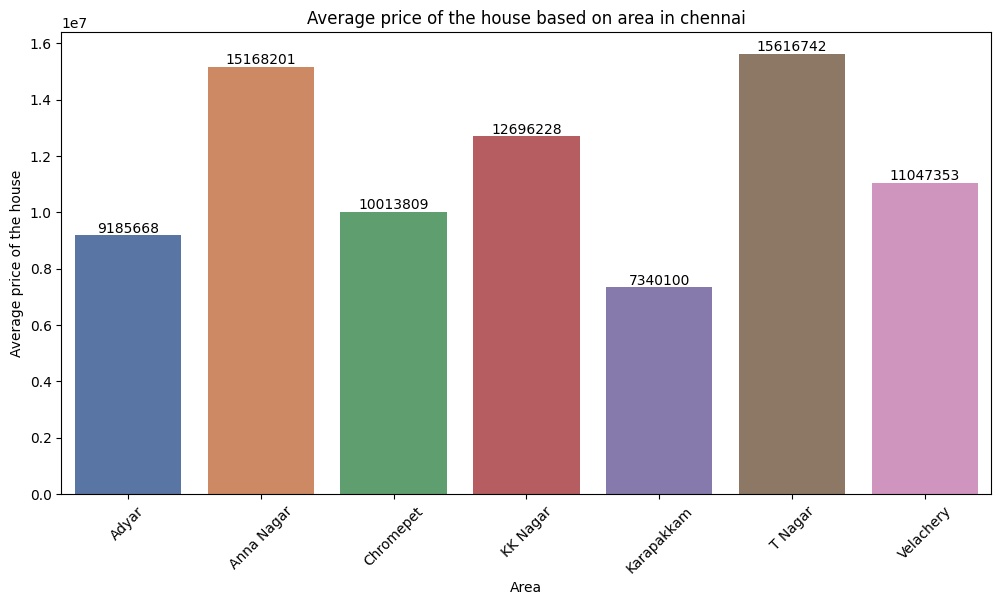

In [71]:
average_sales_price_area = house_price_df.groupby("AREA")['SALES_PRICE'].mean().reset_index()

# Create a barplot for average sales price by AREA
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=average_sales_price_area, x='AREA', y='SALES_PRICE', palette='deep',hue="AREA")
plt.xticks(rotation=45)
plt.title('Average price of the house based on area in chennai')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylabel('Average price of the house')
plt.xlabel('Area')
plt.show()

### Average price of the house on basis of AREA and parking facility

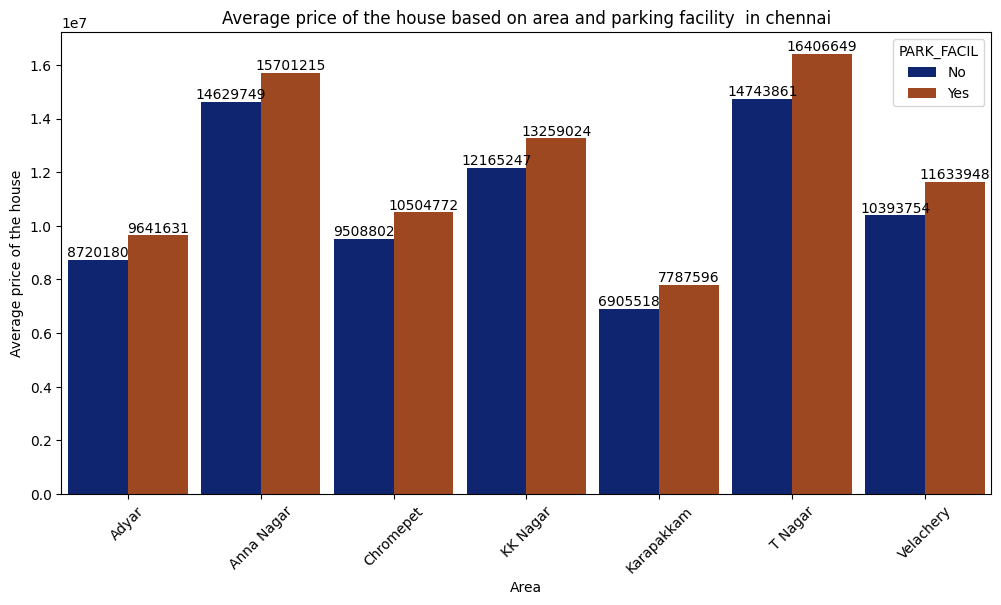

In [73]:
average_sales_price_area = house_price_df.groupby(["AREA","PARK_FACIL"])['SALES_PRICE'].mean().reset_index()

# Create a barplot for average sales price by AREA and parking status
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=average_sales_price_area, x='AREA', y='SALES_PRICE', palette='dark',hue="PARK_FACIL",width=0.9)
plt.xticks(rotation=45)
plt.title('Average price of the house based on area and parking facility  in chennai')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylabel('Average price of the house')
plt.xlabel('Area')
plt.show()

### Average price of house based on STREET condition and Utility status

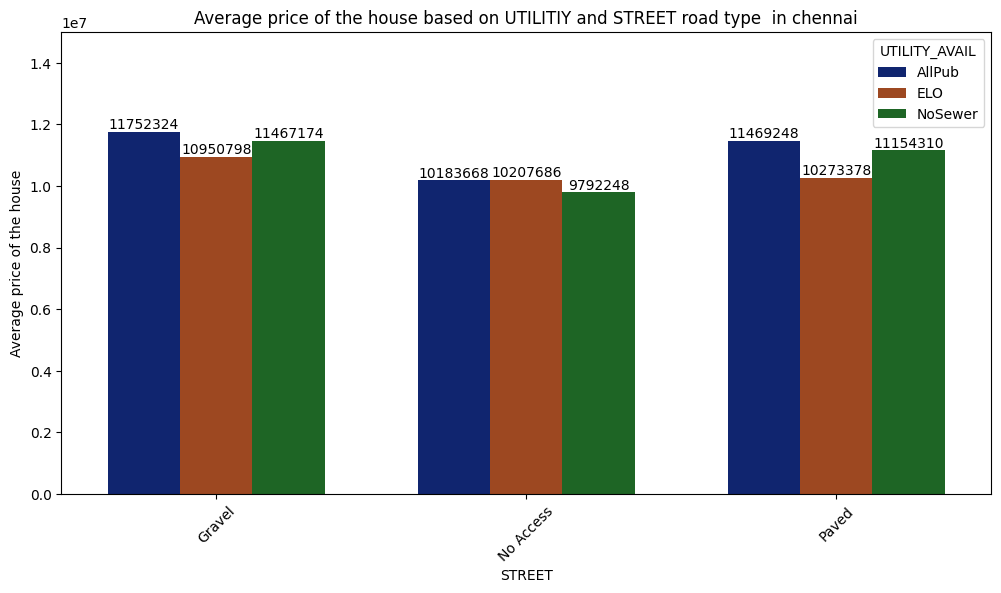

In [75]:
average_sales_price_street_util= house_price_df.groupby(["STREET","UTILITY_AVAIL"])['SALES_PRICE'].mean().reset_index()

# Create a barplot for average sales price by AREA and parking status
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=average_sales_price_street_util, x='STREET', y='SALES_PRICE', palette='dark',hue="UTILITY_AVAIL", width=0.7)
plt.xticks(rotation=45)
plt.title('Average price of the house based on UTILITIY and STREET road type  in chennai')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylabel('Average price of the house')
plt.xlabel('STREET')
plt.ylim(0,15000000)
plt.show()

### Average price of house base on Zone

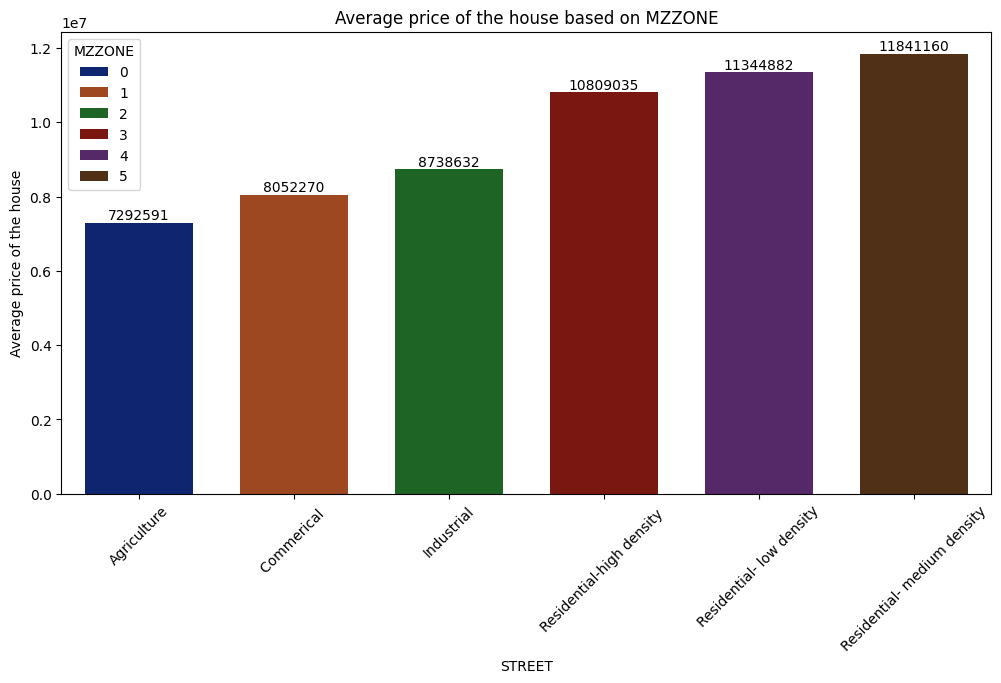

In [227]:
average_sales_price_street_util= house_price_df.groupby("MZZONE")['SALES_PRICE'].mean().reset_index()

# Create a barplot for average sales price by AREA and parking status
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=average_sales_price_street_util, x='MZZONE', y='SALES_PRICE', palette='dark',hue="MZZONE", width=0.7)
plt.xticks(rotation=45)
plt.title('Average price of the house based on MZZONE')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') 
plt.ylabel('Average price of the house')
plt.xlabel('STREET')
new_labels = ['Agriculture', 'Commerical ', 'Industrial', 'Residential-high density ', 'Residential- low density', 'Residential- medium density']
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.show()

### Heat map of numeric columns 

<Axes: >

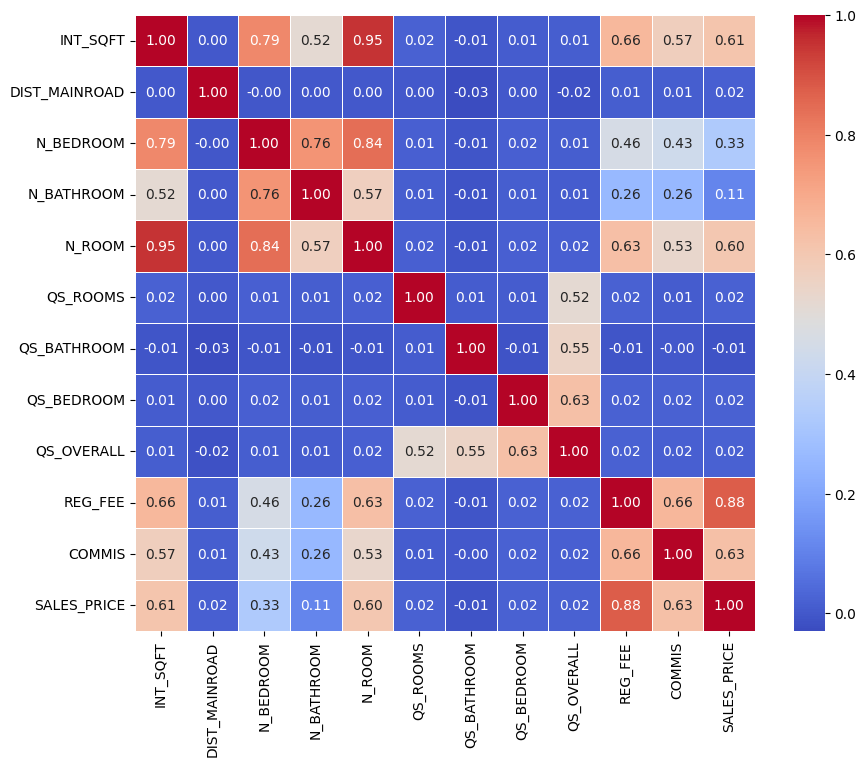

In [79]:
numeric = house_price_df.select_dtypes(include =['float64','int64'])

correlation_matrix = numeric.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

## Regression plot of target variable vs numerical columns 

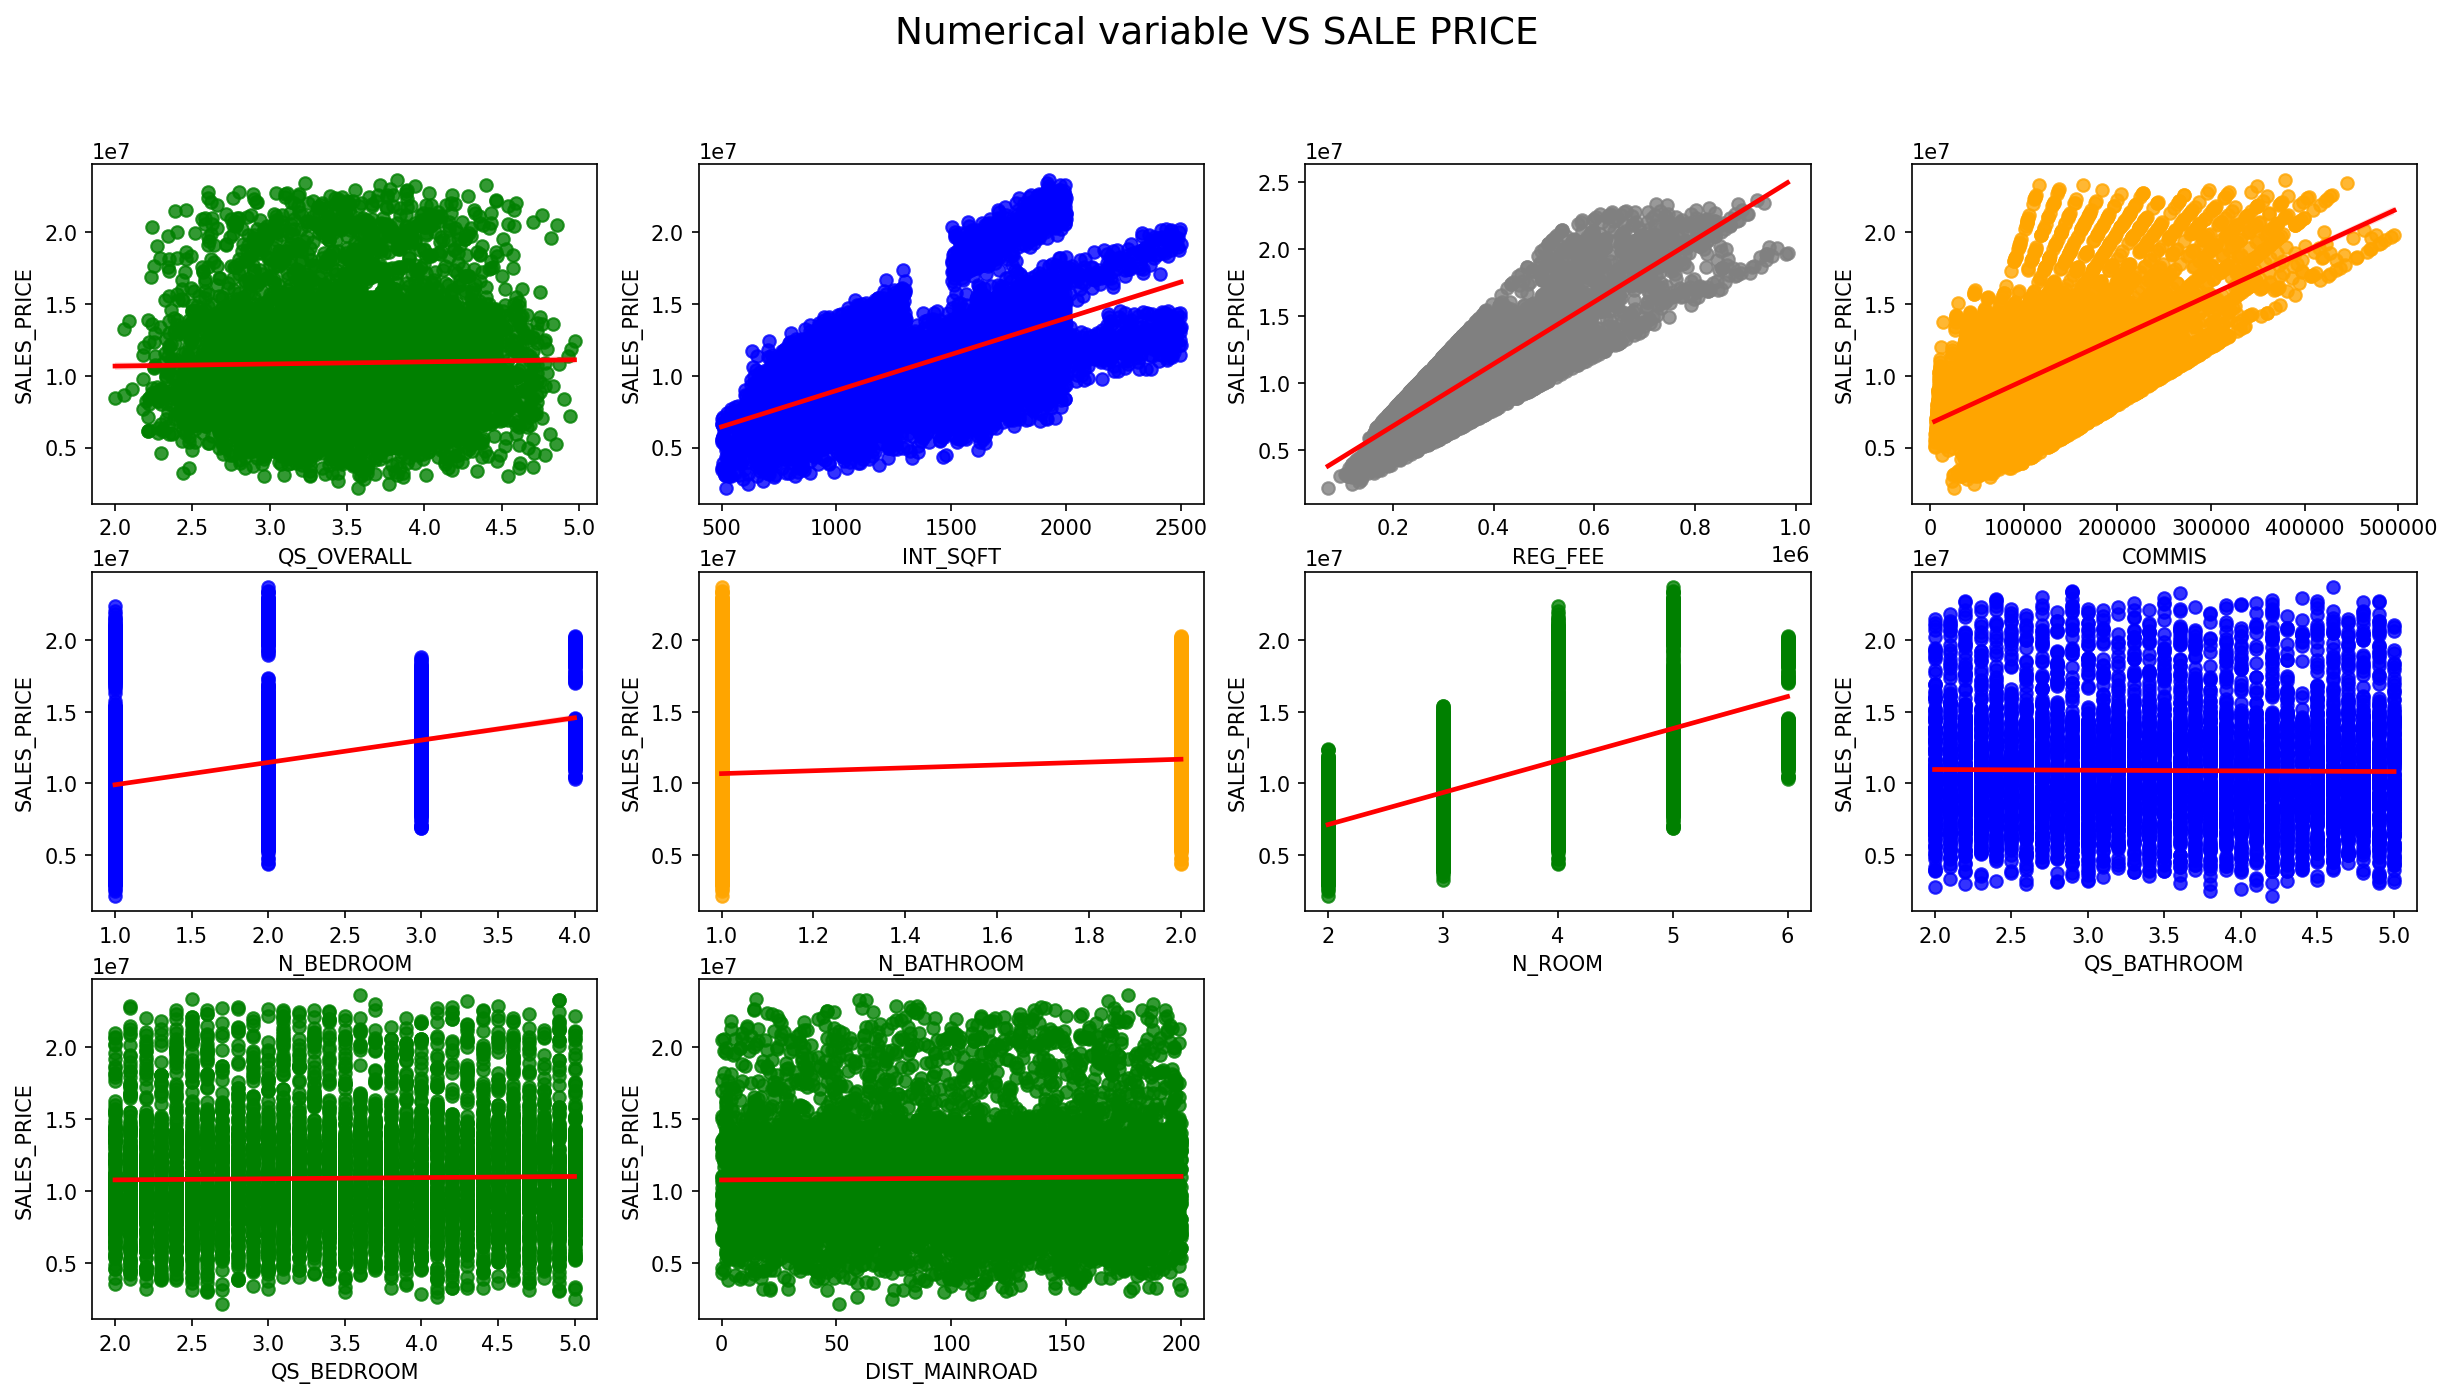

In [81]:
# List of columns to plot
columns = [
    ('QS_OVERALL', 'green'),
    ('INT_SQFT', 'blue'),
    ('REG_FEE', 'grey'),
    ('COMMIS', 'orange'),
    ('N_BEDROOM', 'blue'),
    ('N_BATHROOM', 'orange'),
    ('N_ROOM', 'green'),
    ('QS_BATHROOM', 'blue'),
    ('QS_BEDROOM', 'green'),
    ('DIST_MAINROAD', 'green')
]

# Create the figure with specified size and DPI
plt.figure(figsize=(20, 10), dpi=150)

# Loop through the columns to create the subplots
for i, (columns, color) in enumerate(columns, start=1):
    plt.subplot(3, 4, i)
    sns.regplot(
        x=house_price_df[columns], 
        y=house_price_df.SALES_PRICE, 
        scatter_kws={"color": color}, 
        line_kws={"color": "red"}
    )

# Add the overall title
plt.suptitle("Numerical variable VS SALE PRICE", fontsize=18)

# Show the plot
plt.show()

# 5) Feature Engineering

## 5.1) New feature creation  

In [84]:
house_price_df['AGE_PROPERTY'] = house_price_df['DATE_SALE'].dt.year - house_price_df['DATE_BUILD'].dt.year
house_price_df['AGE_PROPERTY']


0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE_PROPERTY, Length: 7109, dtype: int32

## 5.2) Removal of unwanted features


In [86]:
house_price_df = house_price_df.drop(columns=["DATE_SALE","DATE_BUILD","PRT_ID","REG_FEE","COMMIS"])


## 5.3) Feature Transformation 

### 5.3.1 ) Label Encoding 



In [89]:
label_encoder = LabelEncoder()

In [90]:
label_encoder = LabelEncoder()
for column in house_price_df.select_dtypes(include=['object']).columns:
    house_price_df[column] = label_encoder.fit_transform(house_price_df[column])

### Outlier removal

In [92]:
# Calculate the first (Q1) and third (Q3) quartiles of sale_price
Q1 = house_price_df['SALES_PRICE'].quantile(0.25)
Q3 = house_price_df['SALES_PRICE'].quantile(0.75)

#  IQR 
IQR = Q3 - Q1

# Define the lower and upper bounds 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
house_price_df = house_price_df[(house_price_df['SALES_PRICE'] >= lower_bound) & (house_price_df['SALES_PRICE'] <= upper_bound)]



In [93]:
house_price_df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_PROPERTY
0,4,1004,131,1,1,3,0,1,0,0,2,0,4.0,3.9,4.9,4.33,7600000,44
2,0,909,70,1,1,3,0,1,0,1,0,4,4.1,3.8,2.2,3.09,13159200,20
3,6,1855,14,3,2,5,2,0,2,2,2,2,4.7,3.9,3.6,4.01,9630290,22
4,4,1226,84,1,1,3,0,1,2,0,0,1,3.0,2.5,4.1,3.29,7406250,30
5,2,1220,36,2,1,4,4,0,0,2,1,3,4.5,2.6,3.1,3.32,12394750,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,51,1,1,2,1,0,2,1,1,5,3.0,2.2,2.4,2.52,5353000,49
7105,6,1897,52,3,2,5,2,1,2,2,1,3,3.6,4.5,3.3,3.92,10818480,9
7106,6,1614,152,2,1,4,3,0,1,2,0,2,4.3,4.2,2.9,3.84,8351410,28
7107,4,787,40,1,1,2,4,1,0,1,2,4,4.6,3.8,4.1,4.16,8507000,32


### 5.3.2 ) one hot encoding for nominal categories

In [95]:

house_price_df_encode = pd.get_dummies(house_price_df, columns=['AREA', 'BUILDTYPE', 'STREET','SALE_COND','MZZONE','PARK_FACIL','UTILITY_AVAIL'])
house_price_df_encode

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,...,MZZONE_1,MZZONE_2,MZZONE_3,MZZONE_4,MZZONE_5,PARK_FACIL_0,PARK_FACIL_1,UTILITY_AVAIL_0,UTILITY_AVAIL_1,UTILITY_AVAIL_2
0,1004,131,1,1,3,4.0,3.9,4.9,4.33,7600000,...,False,False,False,False,False,False,True,True,False,False
2,909,70,1,1,3,4.1,3.8,2.2,3.09,13159200,...,False,False,False,True,False,False,True,False,True,False
3,1855,14,3,2,5,4.7,3.9,3.6,4.01,9630290,...,False,True,False,False,False,True,False,False,False,True
4,1226,84,1,1,3,3.0,2.5,4.1,3.29,7406250,...,True,False,False,False,False,False,True,True,False,False
5,1220,36,2,1,4,4.5,2.6,3.1,3.32,12394750,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1,1,2,3.0,2.2,2.4,2.52,5353000,...,False,False,False,False,True,True,False,False,True,False
7105,1897,52,3,2,5,3.6,4.5,3.3,3.92,10818480,...,False,False,True,False,False,False,True,False,False,True
7106,1614,152,2,1,4,4.3,4.2,2.9,3.84,8351410,...,False,True,False,False,False,True,False,False,False,True
7107,787,40,1,1,2,4.6,3.8,4.1,4.16,8507000,...,False,False,False,True,False,False,True,False,True,False


## 5.4) Feature scaling 


In [97]:
standardscaler = StandardScaler()

In [98]:
scaling_df = house_price_df.drop(columns=['SALES_PRICE'])
house_price_scale_df = standardscaler.fit_transform(scaling_df)

# 6) Target variable and feature variable selection

In [100]:
x = house_price_df_encode.drop(columns=['SALES_PRICE'])
y = house_price_df['SALES_PRICE'] # Target columns 

# 7) Splitting data into training and testing set

In [102]:
# Splitting the data into 80 percent for training and 20 percent for testing 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)

# 8) Base Model initialization (Linear Regression)

In [104]:
LinearRegressionmodel = LinearRegression() #model initalization 


## Fitting the base model (linear regression)

In [106]:
LinearRegressionmodel.fit(X_train, y_train) #Fitting the model to traing data 

LinearRegression()

## Prediction on train data (Linear Regression)

In [108]:
y_pred_linear_regression_train = LinearRegressionmodel.predict(X_train)
r2_linear_regression = r2_score(y_train, y_pred_linear_regression_train)
r2_linear_regression

0.9611436124157611

## Prediction on test data (Linear Regression)

In [110]:

y_pred_linear_regression = LinearRegressionmodel.predict(X_test) # Predict the data on test data 
r2_linear_regression = r2_score(y_test, y_pred_linear_regression) # evaluate the r2 score in test data 
r2_linear_regression


0.9616053692957656

 # 9) Model evaluation Linear regression with label encoder

linear_regression  R²: 0.7665
linear_regression MSE: 2448124140752.6479
linear_regression RMSE: 1564648.2483
linear_regression MAE: 1287678.9981
linear_regression Adjusted R²: 0.7636

# Model evaluation Linear regression with one hot encoder

In [114]:

r2_linear_regression = r2_score(y_test, y_pred_linear_regression)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
rmse_linear_regression = np.sqrt(mse_linear_regression)
mae_linear_regression = mean_absolute_error(y_test, y_pred_linear_regression)
n = len(X_train)  
p = 39  
adjusted_r2_linear = 1 - (1 - r2_linear_regression) * (n - 1) / (n - p - 1)
print(f"linear regression R²: {r2_linear_regression:.4f}")
print(f"linear regression  MSE: {mse_linear_regression:.4f}")
print(f"linear regression  RMSE: {rmse_linear_regression:.4f}")
print(f"linear regression  MAE: {mae_linear_regression  :.4f}")
print(f"linear regression  adjusted r: {adjusted_r2_linear :.4f}")

linear regression R²: 0.9616
linear regression  MSE: 402569879254.6489
linear regression  RMSE: 634483.9472
linear regression  MAE: 474100.9694
linear regression  adjusted r: 0.9613


# Cross validation 

In [116]:

cross_validation_fold = KFold(n_splits=7, shuffle=True, random_state=42)
cross_validation_score = cross_val_score(LinearRegressionmodel, X_train, y_train, cv=cross_validation_fold)
print(f"cross_validation scores: {cross_validation_score}")
print(f"Average cross_validation score: {cross_validation_score.mean():.3f} ")

cross_validation scores: [0.95989495 0.96038841 0.96027795 0.95893304 0.95856174 0.96169975
 0.96445375]
Average cross_validation score: 0.961 


In [117]:
y_pred_linear_regression_train.shape

(5504,)

## Residual plot 

Text(0.5, 1.0, 'Residual Plot')

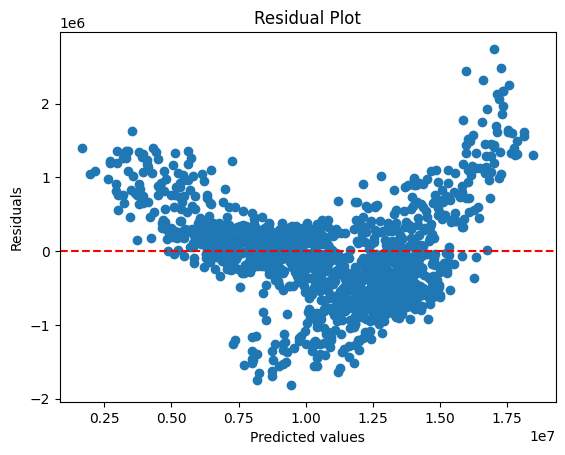

In [119]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_linear_regression
plt.scatter(y_pred_linear_regression, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')



# 10 ) Random Forest Regressor 

In [121]:
random_forest_model = RandomForestRegressor()

# Training the random forest regressor in training data set 

In [123]:
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

# Prediction of Random forest regressor

## Test data 

In [126]:
y_pred_random_forest = random_forest_model.predict(X_test)
r2_score(y_test, y_pred_random_forest)

0.9762529995948442

## train data

In [128]:
y_pred_random_forest_train = random_forest_model.predict(X_train)
r2_score(y_train, y_pred_random_forest_train)


0.9968240522308044

# Model evaluation Random forest regressor

In [130]:

r2_random_forest = r2_score(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
n = len(X_train)  
p = 39  
adjusted_r2_random = 1 - (1 - r2_random_forest) * (n - 1) / (n - p - 1)
print(f"Random Forest R²: {r2_random_forest:.4f}")
print(f"Random Forest MSE: {mse_random_forest:.4f}")
print(f"Random Forest RMSE: {rmse_random_forest :.4f}")
print(f"Random Forest MAE: {mae_random_forest :.4f}")
print(f"Random Forest ajusted r2: {adjusted_r2_random :.4f}")

Random Forest R²: 0.9763
Random Forest MSE: 248988645297.9827
Random Forest RMSE: 498987.6204
Random Forest MAE: 382188.9864
Random Forest ajusted r2: 0.9761


# Random forest hyperparameter tunning 

In [132]:

param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [10, None],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['log2', 'sqrt'],  
    'bootstrap': [True]
    
}
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [133]:
random_forest_model_tuned = RandomForestRegressor( max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=200,bootstrap=True)

In [134]:
random_forest_model_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

# Prediction in test data after hyper tunning 

In [136]:
y_pred_random_forest_tuned_train = random_forest_model_tuned.predict(X_test)

In [137]:
X_train.shape[1]

39

## After hyper tunning random forest

In [139]:
r2_random_forest = r2_score(y_test, y_pred_random_forest_tuned_train)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest_tuned_train)
rmse_random_forest = np.sqrt(mse_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest_tuned_train)
n = len(X_train)  
p = 39 
adjusted_r2_random = 1 - (1 - r2_random_forest) * (n - 1) / (n - p - 1)
print(f"Random Forest R²: {r2_random_forest:.4f}")
print(f"Random Forest MSE: {mse_random_forest:.4f}")
print(f"Random Forest RMSE: {rmse_random_forest :.4f}")
print(f"Random Forest MAE: {mae_random_forest :.4f}")
print(f"Random Forest ajusted r2: {adjusted_r2_random :.4f}")

Random Forest R²: 0.9727
Random Forest MSE: 286529204251.9720
Random Forest RMSE: 535284.2275
Random Forest MAE: 419717.1389
Random Forest ajusted r2: 0.9725


# 11 Ensemble learning method (stacking) 

In [141]:
# Define base models for stacking 
base_learners = [
    ('Random_forest', random_forest_model),
    ('linear_regression', LinearRegressionmodel)
]

# StackingRegressor initialization 

In [143]:
# Create the ensemble Stacking Regressor using random forest and linear regression model as estimator and 
# final estimator model as random forest
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=random_forest_model)

# Fitting the stacking regressor 

In [145]:
# Training  the ensemble stacking model
stacking_regressor.fit(X_train, y_train)


StackingRegressor(estimators=[('Random_forest', RandomForestRegressor()),
                              ('linear_regression', LinearRegression())],
                  final_estimator=RandomForestRegressor())

# Prediction on test data for stackingRegressor 

In [147]:
y_pred_stacking = stacking_regressor.predict(X_test)
r2_score(y_test, y_pred_stacking)

0.9887783896887082

# Model evaluation for Stacking regressor 

In [149]:
r2_stacking_model = r2_score(y_test, y_pred_stacking)
mse_stacking_model = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking_model = np.sqrt(mse_random_forest)
mae_stacking_model = mean_absolute_error(y_test, y_pred_stacking)
n = len(X_train)  
p = 39
adjusted_r2_stack = 1 - (1 - r2_stacking_model) * (n - 1) / (n - p - 1)
print(f"Ensemble stacking model R²: {r2_stacking_model :.4f}")
print(f"Ensemble stacking model MSE: {mse_stacking_model:.4f}")
print(f"Ensemble stacking model RMSE: {rmse_stacking_model :.4f}")
print(f"Ensemble stacking modelMAE: {mae_stacking_model :.4f}")
print(f"Ensemble stacking adjusted r2 : {adjusted_r2_stack :.4f}")

Ensemble stacking model R²: 0.9888
Ensemble stacking model MSE: 117659220187.8169
Ensemble stacking model RMSE: 535284.2275
Ensemble stacking modelMAE: 252605.1807
Ensemble stacking adjusted r2 : 0.9887


## 12 Model comparison

In [151]:


models = ["Linear Regression", "Random Forest", "Stacking"]
r2 = [r2_linear_regression, r2_random_forest, r2_stacking_model]
mse = [mse_linear_regression, mse_random_forest, mse_stacking_model]
rmse = [rmse_linear_regression, rmse_random_forest, rmse_stacking_model]
mae = [mae_linear_regression, mae_random_forest, mae_stacking_model]
adj_r2=[adjusted_r2_linear,adjusted_r2_random,adjusted_r2_stack]


(0.0, 1.5)

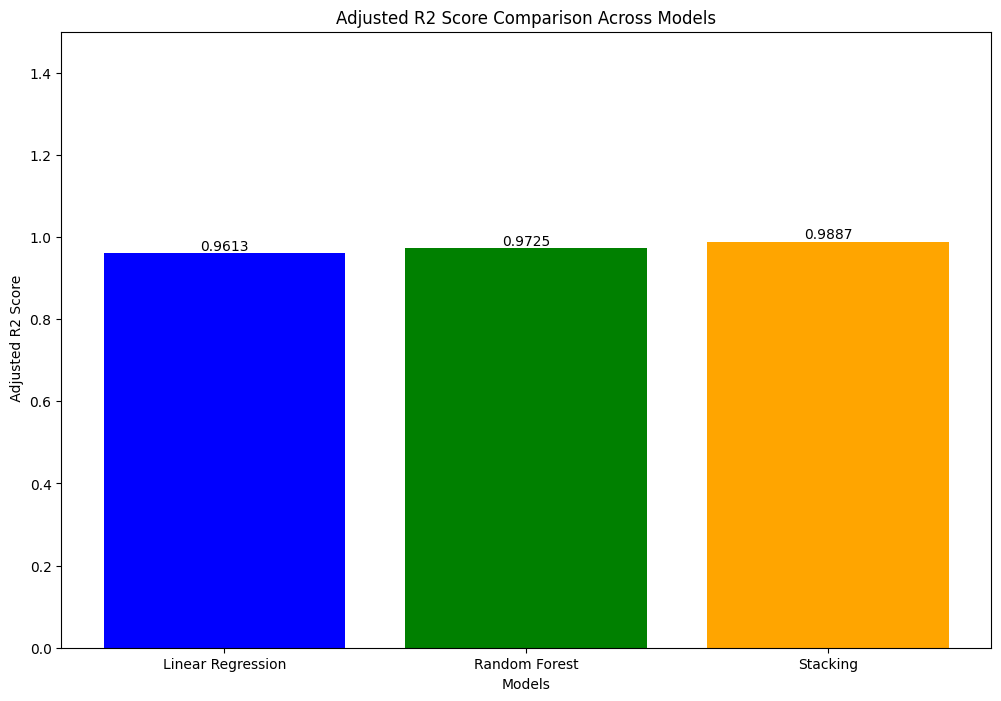

In [152]:

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, adj_r2, color=['blue', 'green', 'orange'])


ax.bar_label(bars, fmt='%.4f', label_type='edge')

ax.set_xlabel("Models")
ax.set_ylabel(" Adjusted R2 Score")
ax.set_title("Adjusted R2 Score Comparison Across Models")
ax.set_ylim(0, 1.5)

(0.0, 1.5)

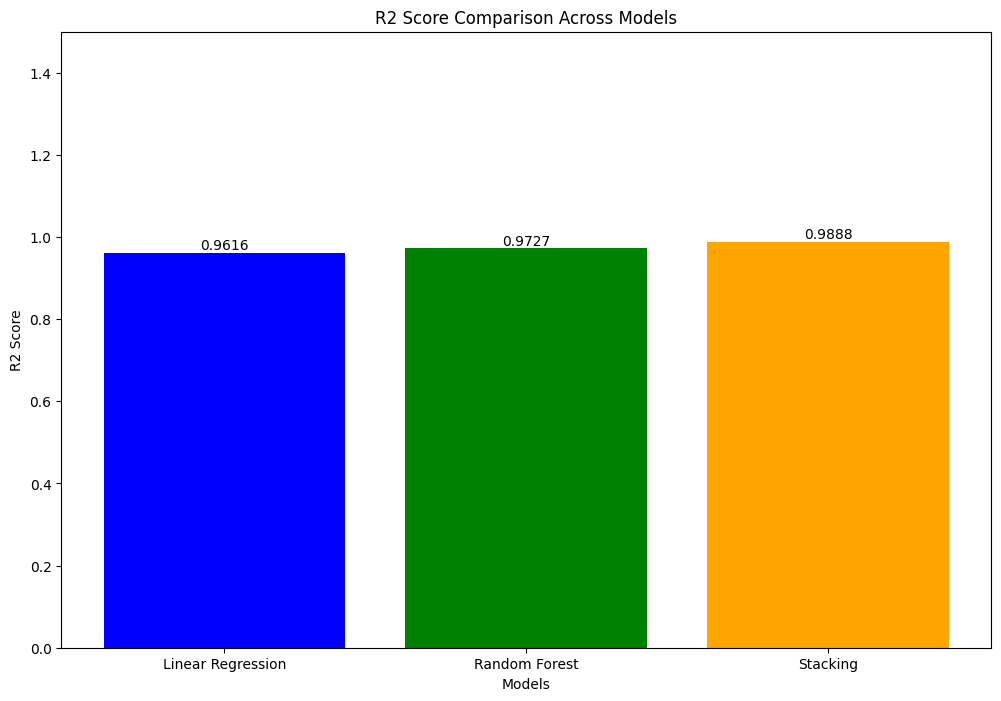

In [153]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, r2, color=['blue', 'green', 'orange'])

# Add labels to the bars
ax.bar_label(bars, fmt='%.4f', label_type='edge')

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("R2 Score")
ax.set_title("R2 Score Comparison Across Models")
ax.set_ylim(0, 1.5)

Text(0.5, 1.0, 'RMSE Score Comparison Across Models')

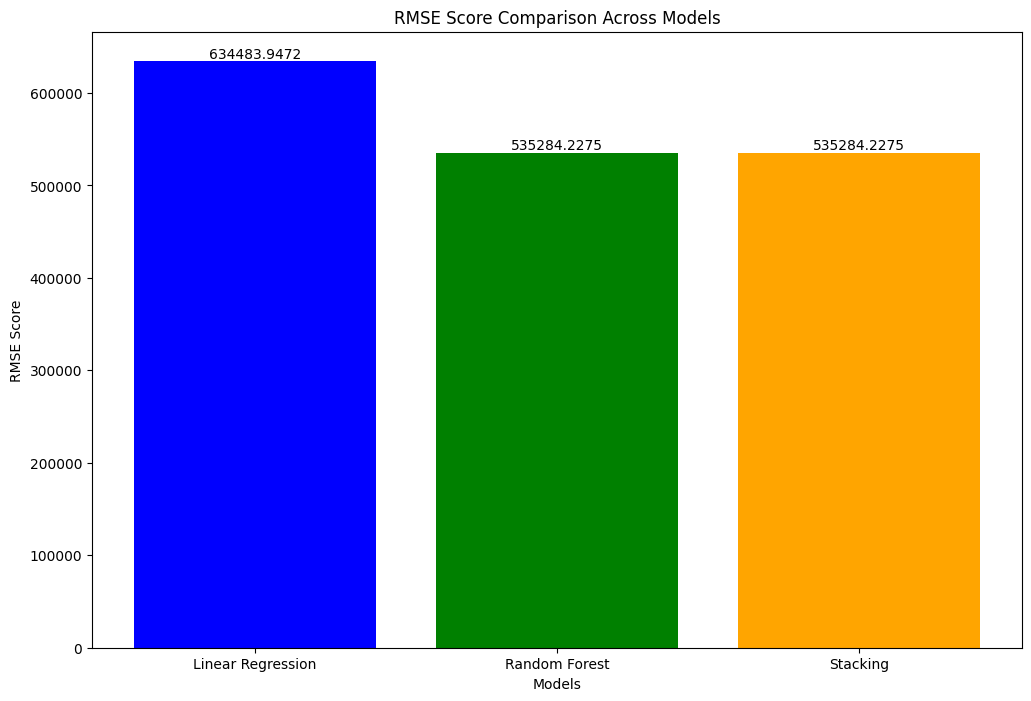

In [154]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, rmse, color=['blue', 'green', 'orange'])

# Add labels to the bars
ax.bar_label(bars, fmt='%.4f', label_type='edge')

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("RMSE Score")
ax.set_title("RMSE Score Comparison Across Models")


Text(0.5, 1.0, 'MSE Score Comparison Across Models')

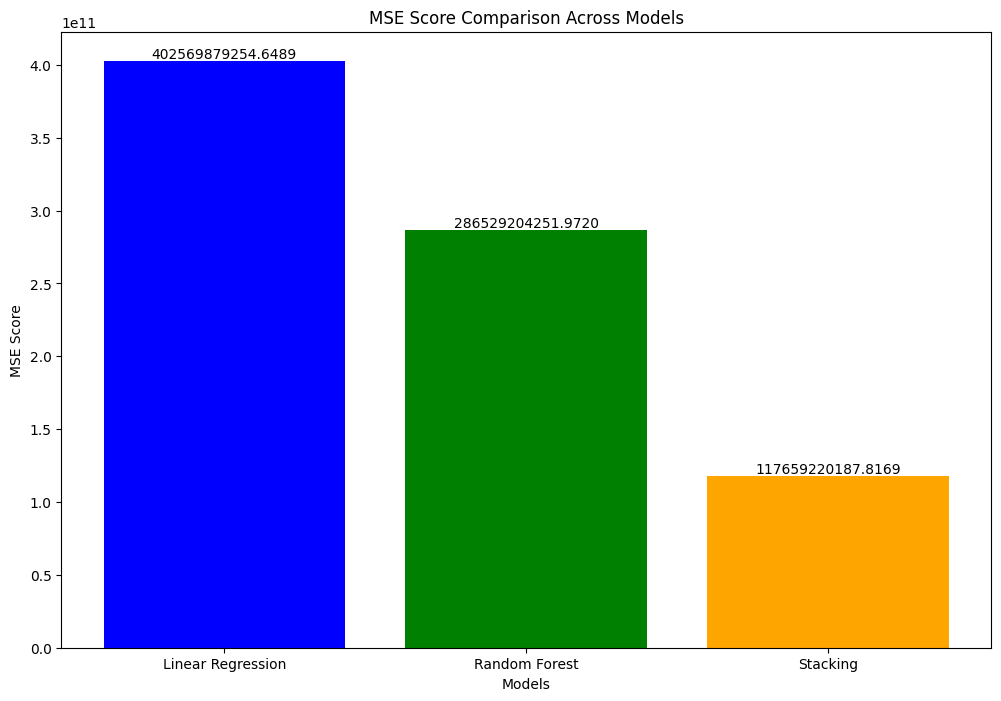

In [155]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, mse, color=['blue', 'green', 'orange'])

# Add labels to the bars
ax.bar_label(bars, fmt='%.4f', label_type='edge')

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("MSE Score")
ax.set_title("MSE Score Comparison Across Models")


Text(0.5, 1.0, 'MAE Score Comparison Across Models')

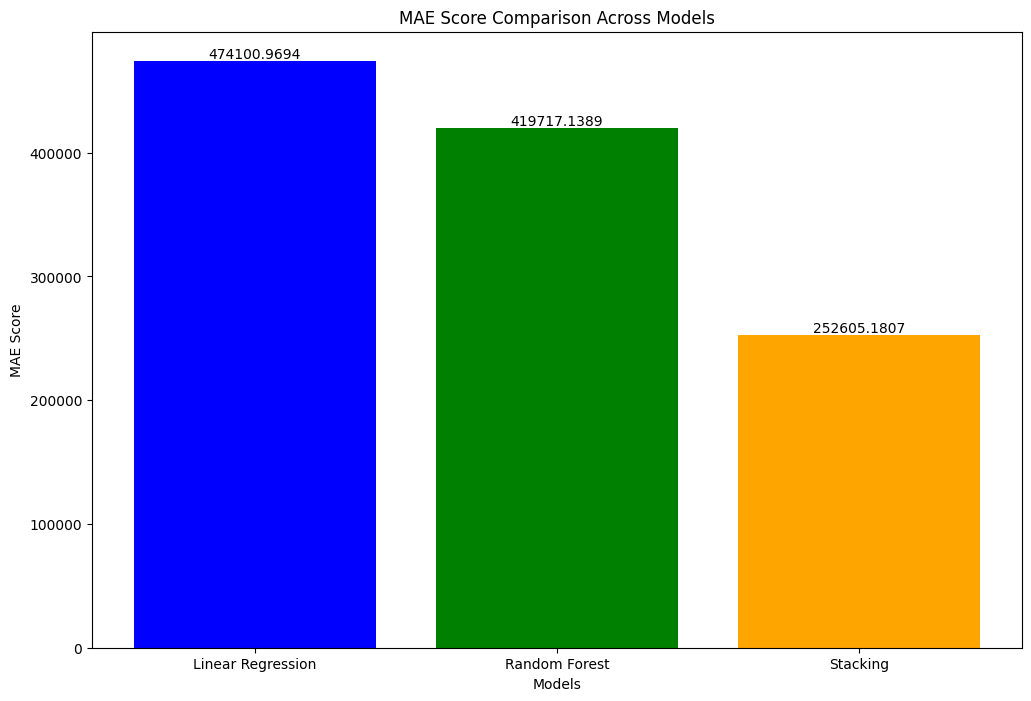

In [156]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(models, mae, color=['blue', 'green', 'orange'])

# Add labels to the bars
ax.bar_label(bars, fmt='%.4f', label_type='edge')

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("MAE Score")
ax.set_title("MAE Score Comparison Across Models")
